In [25]:
import numpy as np 
import pandas as pd
from os import listdir
import matplotlib.pyplot as plt
%matplotlib inline


import time
from sklearn import linear_model
from scipy.stats.stats import pearsonr
import scipy as scipy
import random
from sklearn.linear_model import Ridge

import pandas as pd
import seaborn as sns; sns.set(style="ticks", color_codes=True)
from sklearn.decomposition import PCA

# This Notebook explores for trends in basic statistical properties (max, STD, Skew etc.) over the data set, corrlate with the failure time. We find some trends between skew now and skew later, but not much else

In [2]:
#Loads the training data set, and the test data set randomly. Also can apply any filters

proj_dir="C:\\Users\Rees\\Documents\\Python Scripts\\Kaggle\\Earth Quake Guessing\\all (1)\\"
data_dir="no_overlap_cuts\\"
data=listdir(proj_dir+data_dir)
random.shuffle(data)

ntrain=4000
ntest=100

listdir(proj_dir+data_dir)
train_set=data[0:ntrain]
test_set=data[ntrain+1:ntrain+ntest]

x_train=[]
y_train=[]
for i in range(len(train_set)):
    holder=np.load(proj_dir+data_dir+train_set[i])
    x_train.append(holder[1])
    y_train.append(holder[0][0])
x_train=np.array(x_train,dtype=float)
print("Train Set Loaded")

x_test=[]
y_test=[]
for i in range(len(test_set)):
    holder=np.load(proj_dir+data_dir+test_set[i])
    x_test.append(holder[1])
    y_test.append(holder[0][0])
x_test=np.array(x_test,dtype=float)

print("Train Set Loaded")

Train Set Loaded
Train Set Loaded


In [39]:
#Chopped data set statistics only
def feature_extractor(xx,cut):
    holder1=[xx[i:i + cut] for i in range(0, len(xx), cut)]
    mean=np.mean(holder1,1)
    skew=scipy.stats.skew(holder1,1)
    maxx=np.log(np.max(holder1,1))
    stdd=np.log(np.std(holder1,1))
    kurt=np.log(scipy.stats.kurtosis(holder1,1))
    return(np.hstack([mean,skew,maxx,stdd,kurt]))

In [56]:
feat_Vec=[]
time_to_event=[]
cutter=int(150000/10)
for i in range(4000):
    sample1=x_train[i]
    time_to_event.append(y_train[i])
    feat_Vec.append(feature_extractor(sample1,cutter))
#return(np.hstack([mean,skew,maxx,stdd,kurt]))

C:\Users\Rees\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


C:\Users\Rees\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


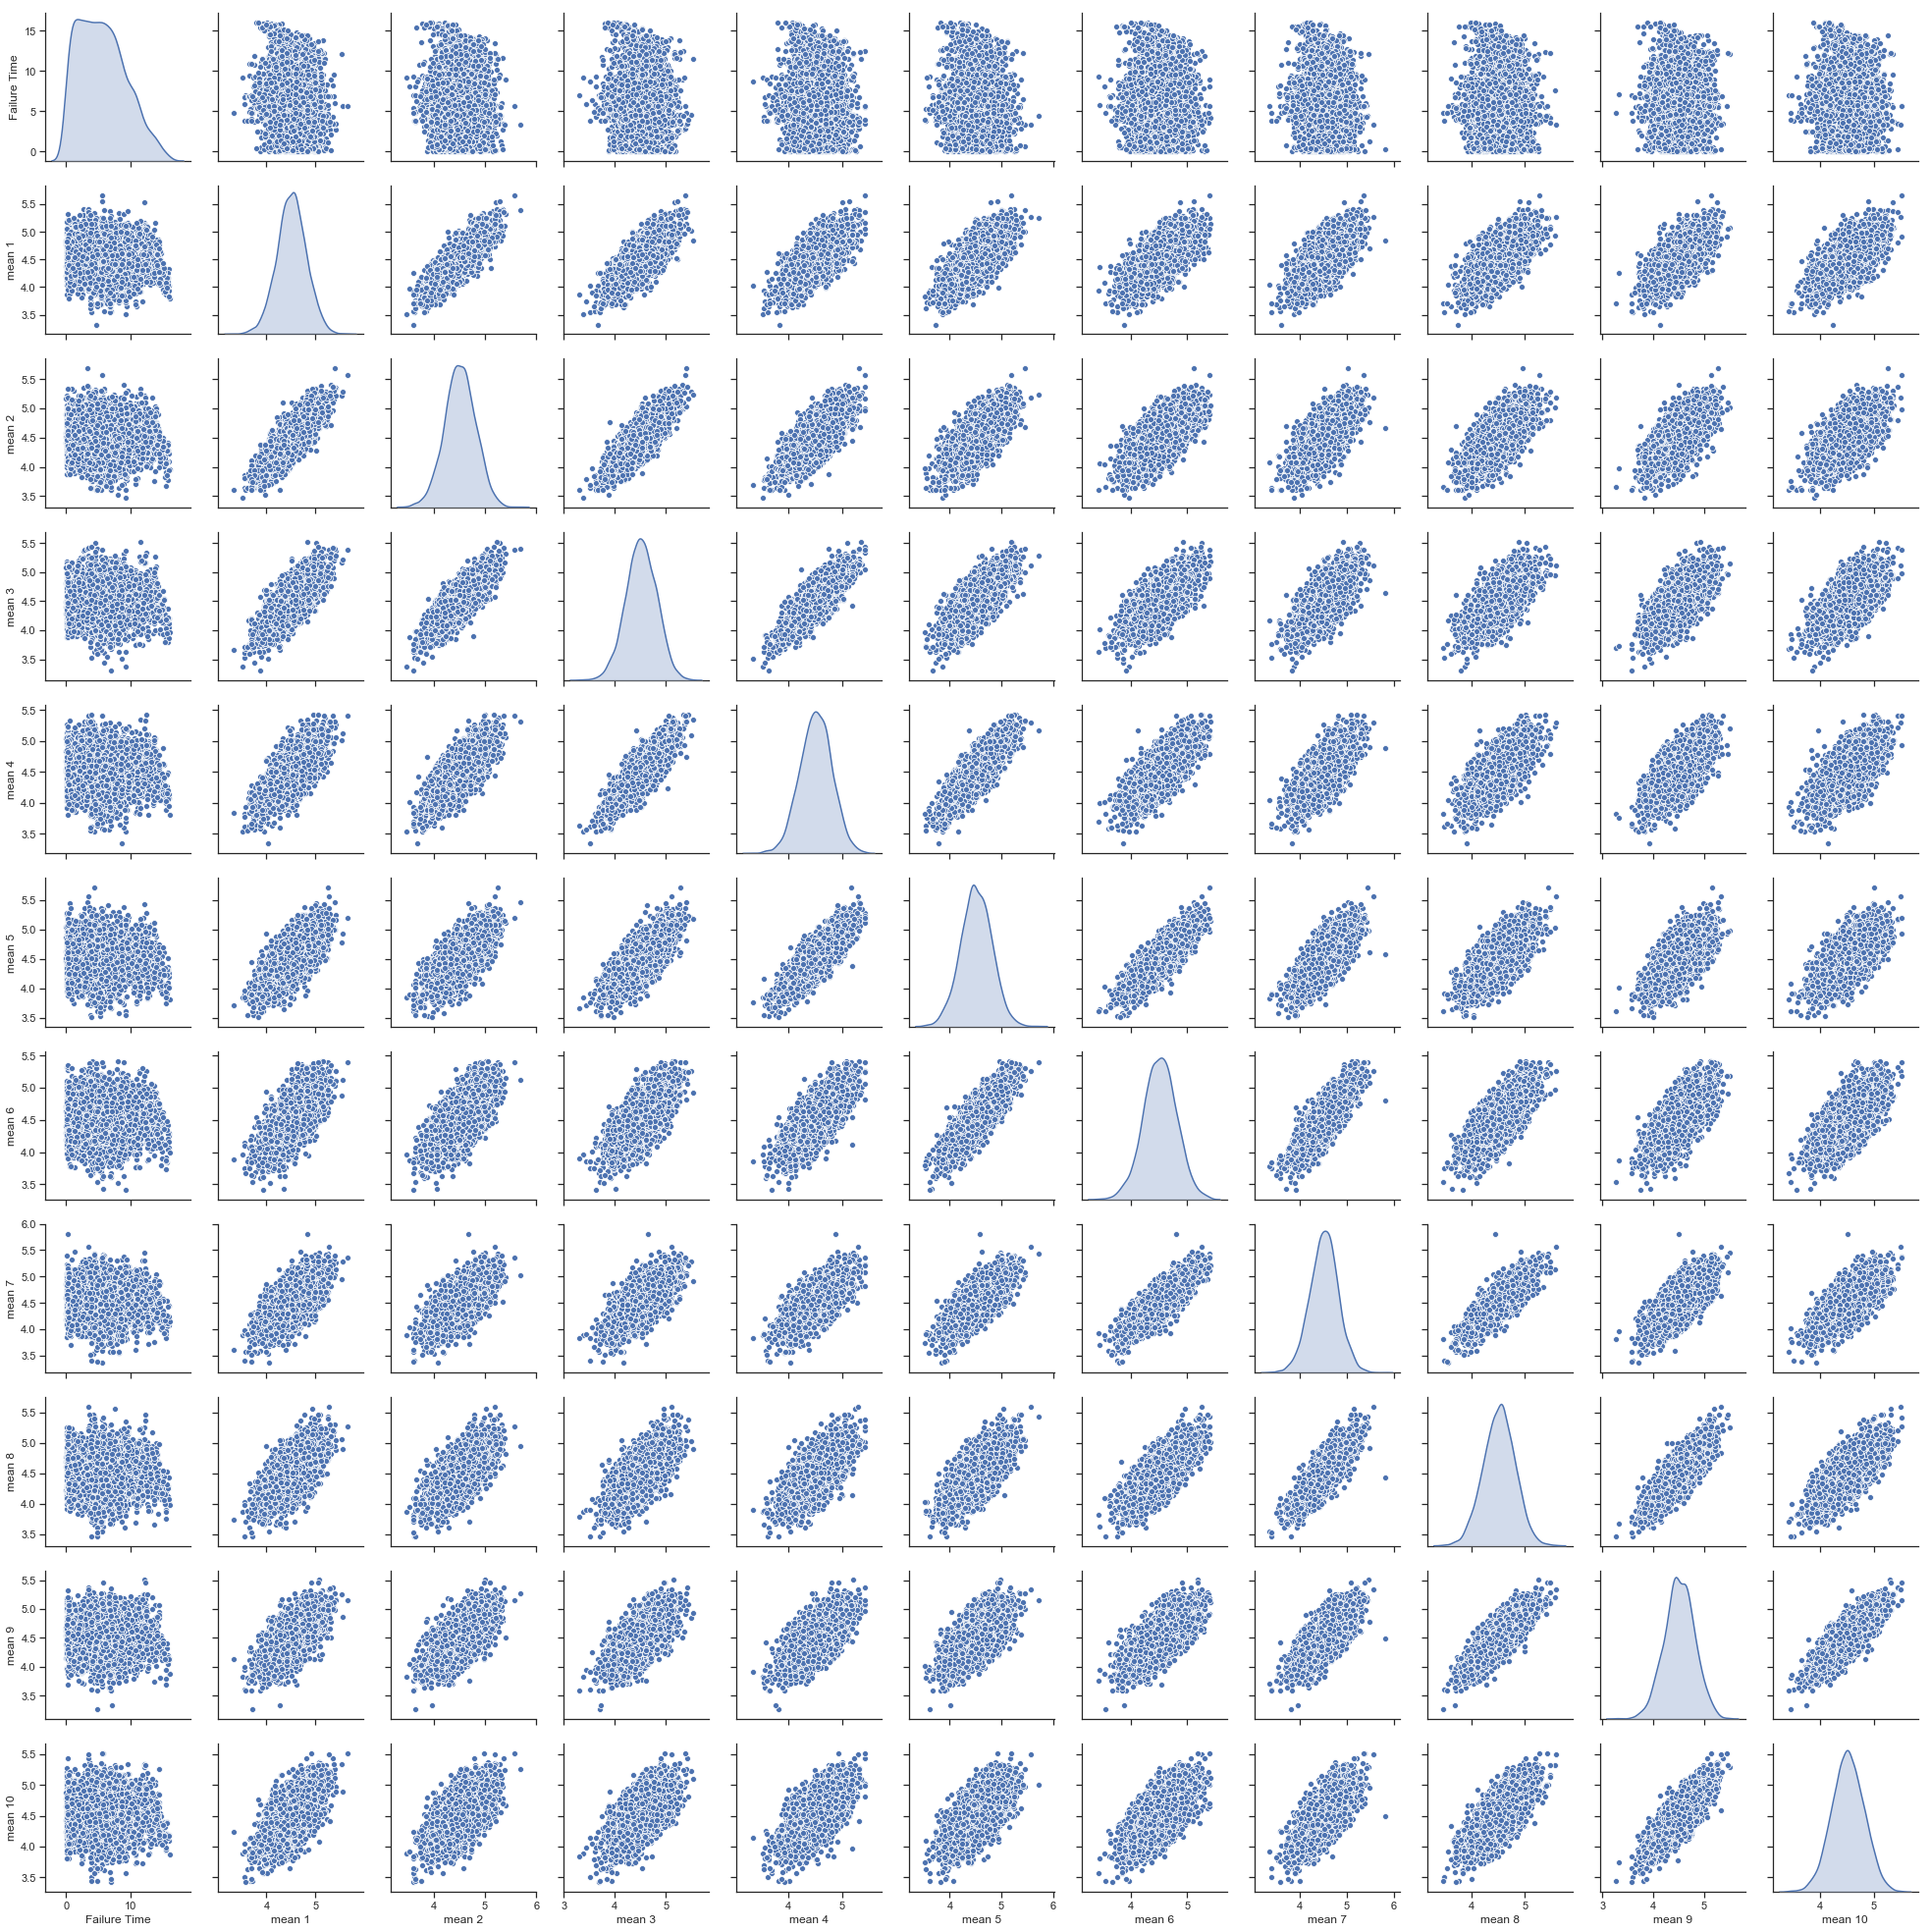

In [76]:
#return(np.hstack([mean,skew,maxx,stdd,kurt]))
d = {"Failure Time":time_to_event,\
     "mean 1":[feat_Vec[i][0] for i in range(len(feat_Vec))],\
     "mean 2":[feat_Vec[i][1] for i in range(len(feat_Vec))],\
     "mean 3":[feat_Vec[i][2] for i in range(len(feat_Vec))],\
     "mean 4":[feat_Vec[i][3] for i in range(len(feat_Vec))],\
     "mean 5":[feat_Vec[i][4] for i in range(len(feat_Vec))],\
     "mean 6":[feat_Vec[i][5] for i in range(len(feat_Vec))],\
     "mean 7":[feat_Vec[i][6] for i in range(len(feat_Vec))],\
     "mean 8":[feat_Vec[i][7] for i in range(len(feat_Vec))],\
     "mean 9":[feat_Vec[i][8] for i in range(len(feat_Vec))],\
     "mean 10":[feat_Vec[i][9] for i in range(len(feat_Vec))],}
df = pd.DataFrame(data=d)
g=sns.pairplot(df,diag_kind="kde")

C:\Users\Rees\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


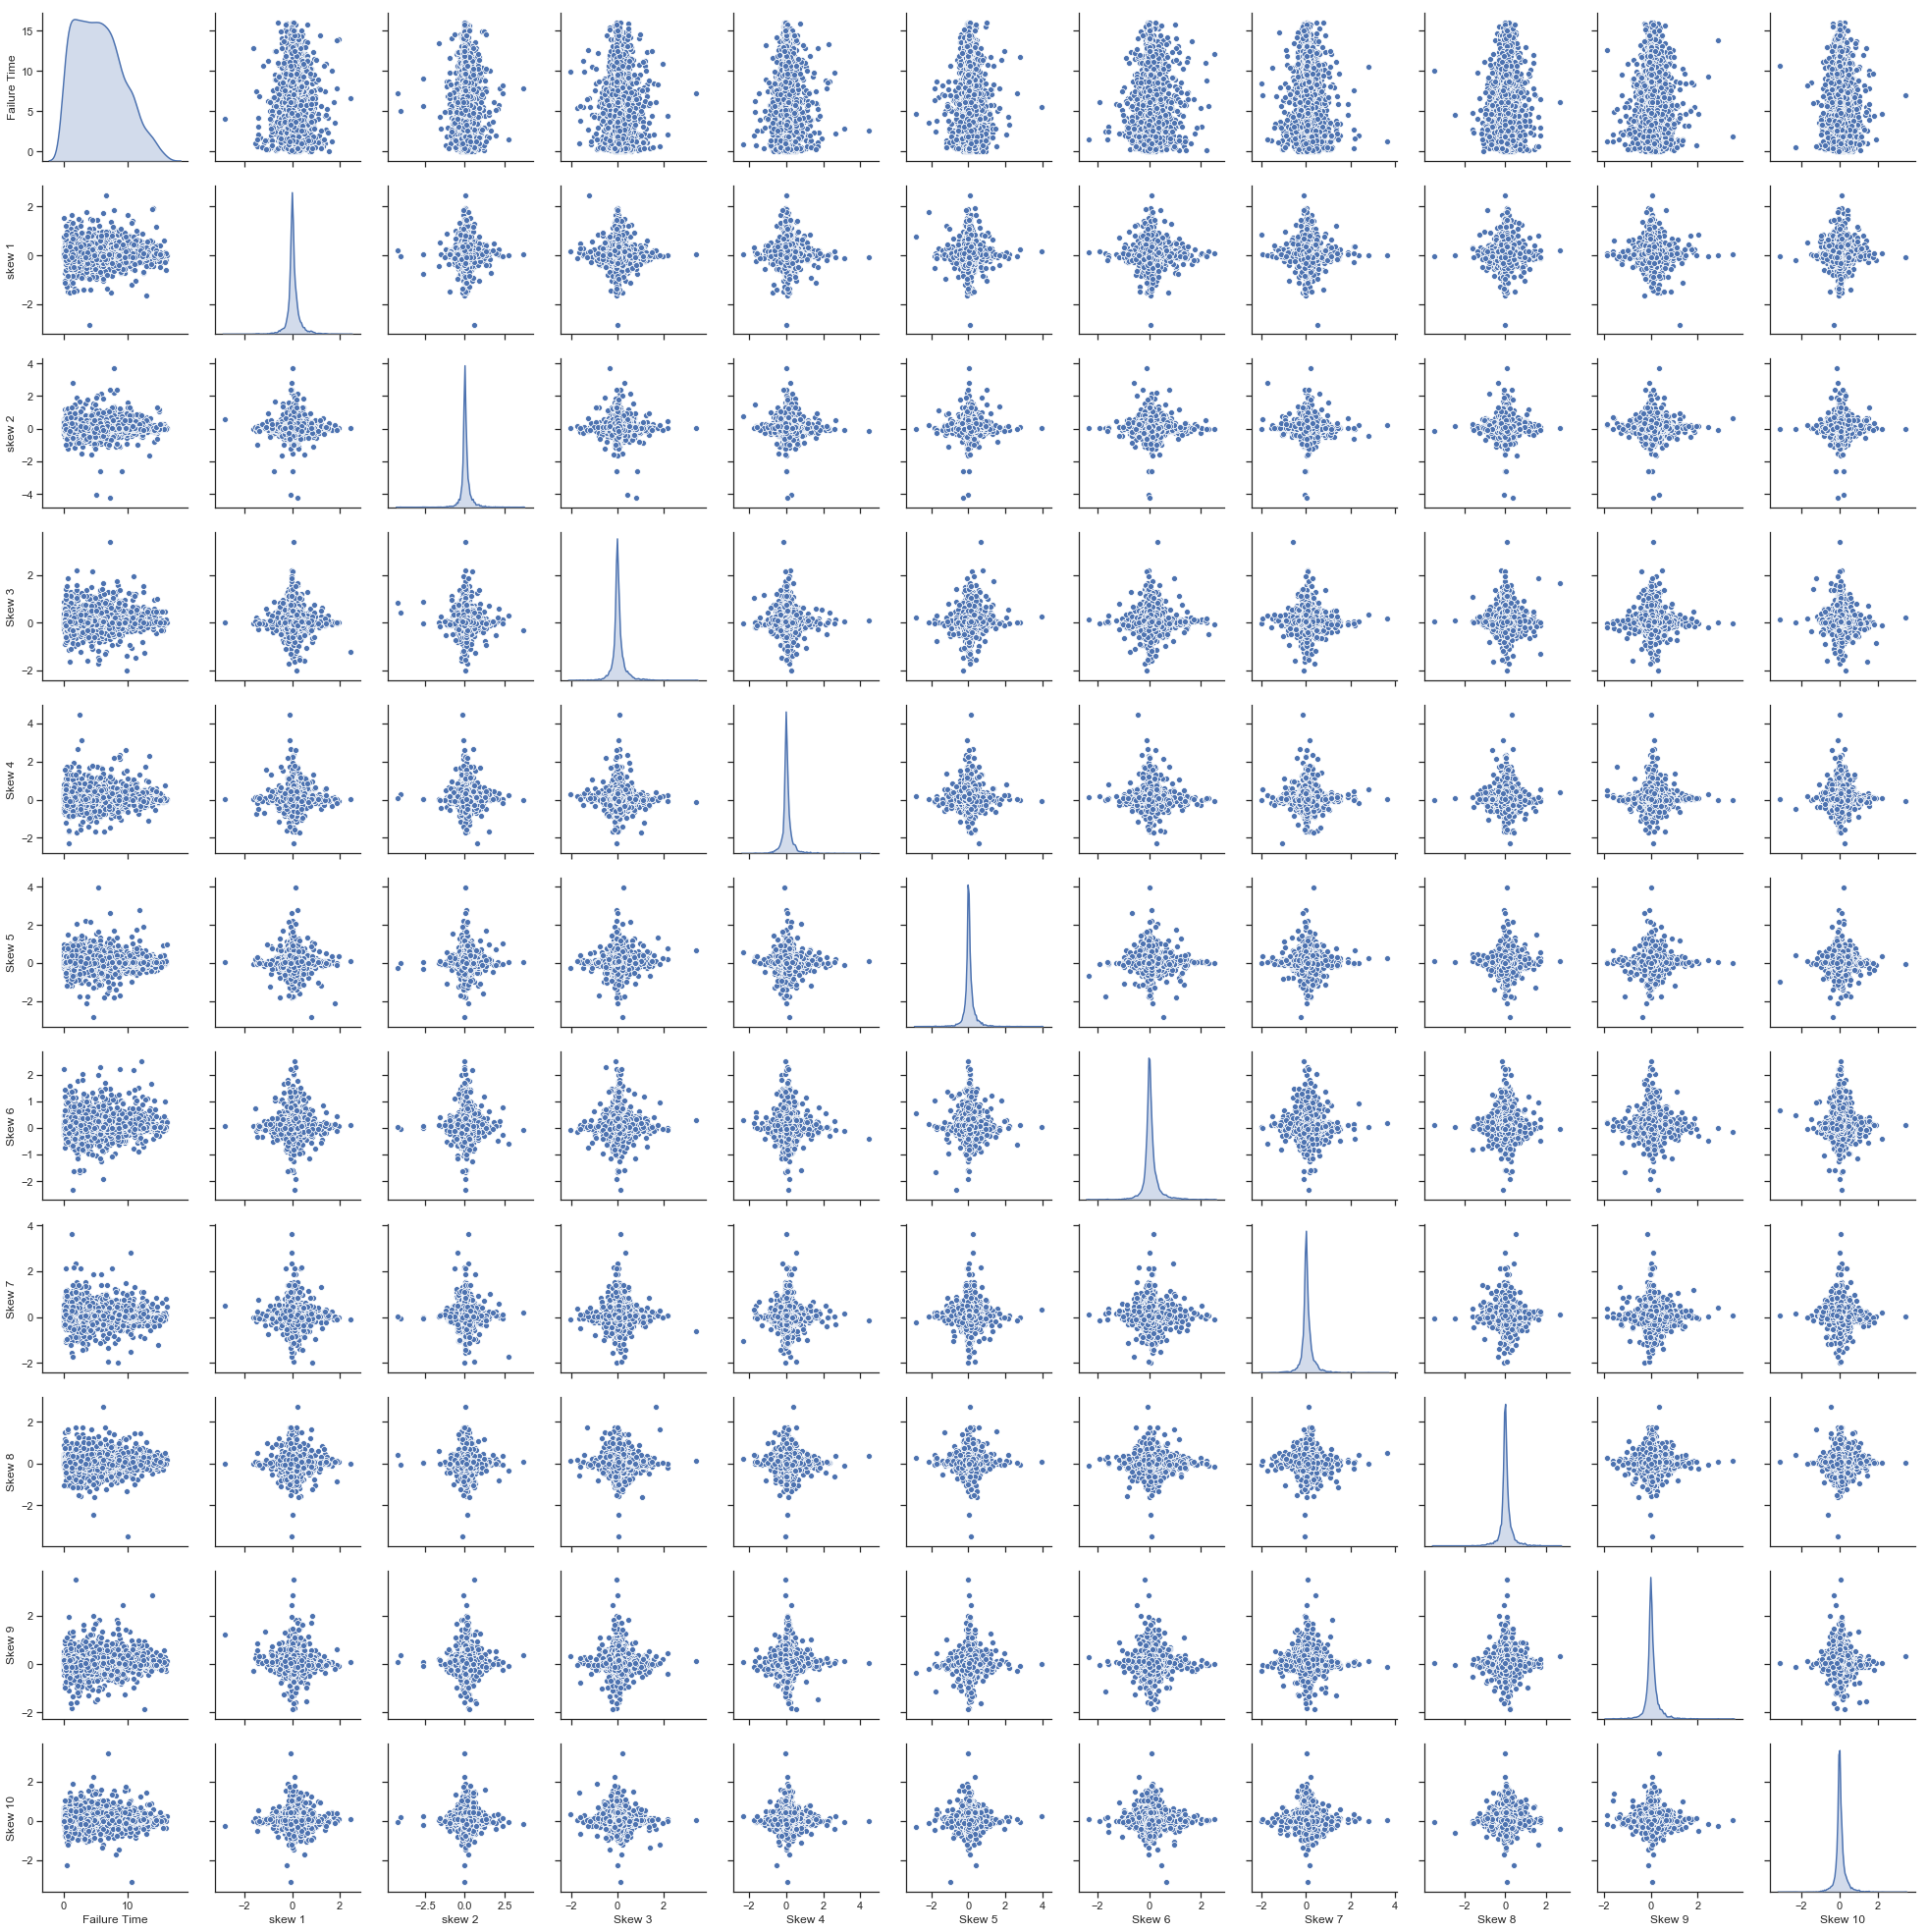

In [77]:
#return(np.hstack([Skew,skew,maxx,stdd,kurt]))
d = {"Failure Time":time_to_event,\
     "skew 1":[feat_Vec[i][10] for i in range(len(feat_Vec))],\
     "skew 2":[feat_Vec[i][11] for i in range(len(feat_Vec))],\
     "Skew 3":[feat_Vec[i][12] for i in range(len(feat_Vec))],\
     "Skew 4":[feat_Vec[i][13] for i in range(len(feat_Vec))],\
     "Skew 5":[feat_Vec[i][14] for i in range(len(feat_Vec))],\
     "Skew 6":[feat_Vec[i][15] for i in range(len(feat_Vec))],\
     "Skew 7":[feat_Vec[i][16] for i in range(len(feat_Vec))],\
     "Skew 8":[feat_Vec[i][17] for i in range(len(feat_Vec))],\
     "Skew 9":[feat_Vec[i][18] for i in range(len(feat_Vec))],\
     "Skew 10":[feat_Vec[i][19] for i in range(len(feat_Vec))],}
df = pd.DataFrame(data=d)
g=sns.pairplot(df,diag_kind="kde")


C:\Users\Rees\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


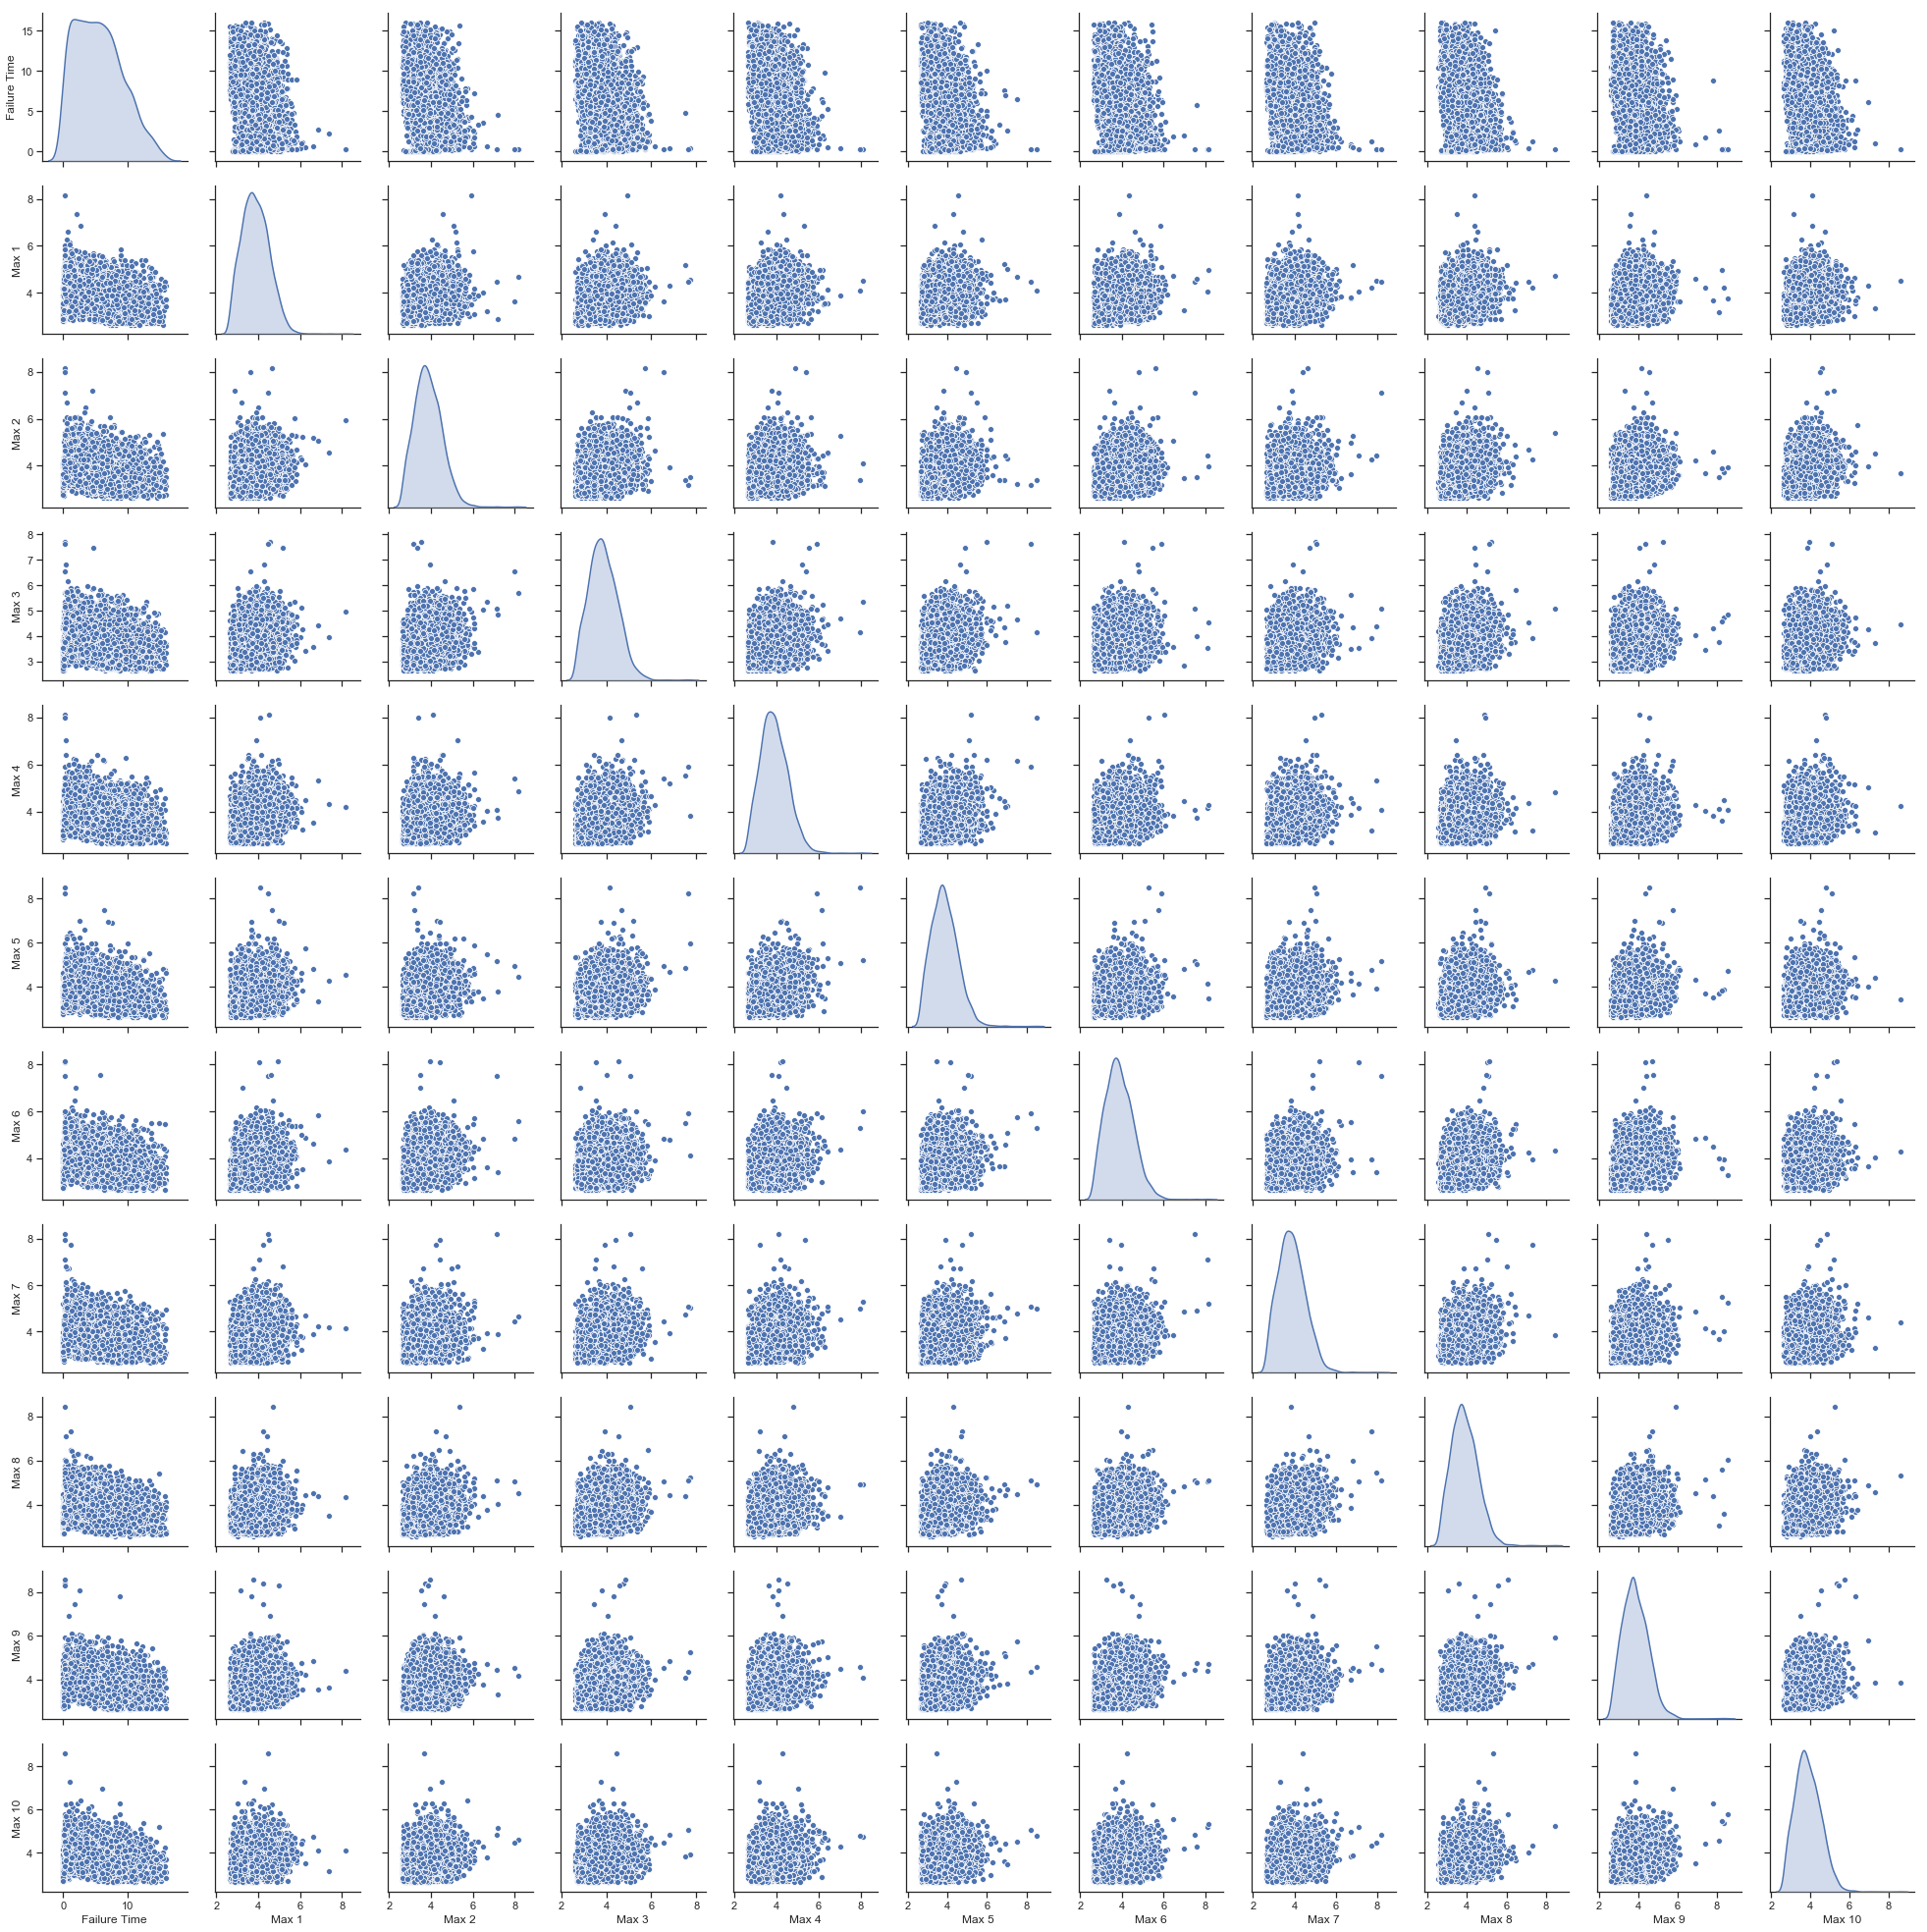

In [78]:
#return(np.hstack([Max,Max,maxx,stdd,kurt]))
d = {"Failure Time":time_to_event,\
     "Max 1":[feat_Vec[i][20] for i in range(len(feat_Vec))],\
     "Max 2":[feat_Vec[i][21] for i in range(len(feat_Vec))],\
     "Max 3":[feat_Vec[i][22] for i in range(len(feat_Vec))],\
     "Max 4":[feat_Vec[i][23] for i in range(len(feat_Vec))],\
     "Max 5":[feat_Vec[i][24] for i in range(len(feat_Vec))],\
     "Max 6":[feat_Vec[i][25] for i in range(len(feat_Vec))],\
     "Max 7":[feat_Vec[i][26] for i in range(len(feat_Vec))],\
     "Max 8":[feat_Vec[i][27] for i in range(len(feat_Vec))],\
     "Max 9":[feat_Vec[i][28] for i in range(len(feat_Vec))],\
     "Max 10":[feat_Vec[i][29] for i in range(len(feat_Vec))],}
df = pd.DataFrame(data=d)
g=sns.pairplot(df,diag_kind="kde")a


C:\Users\Rees\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


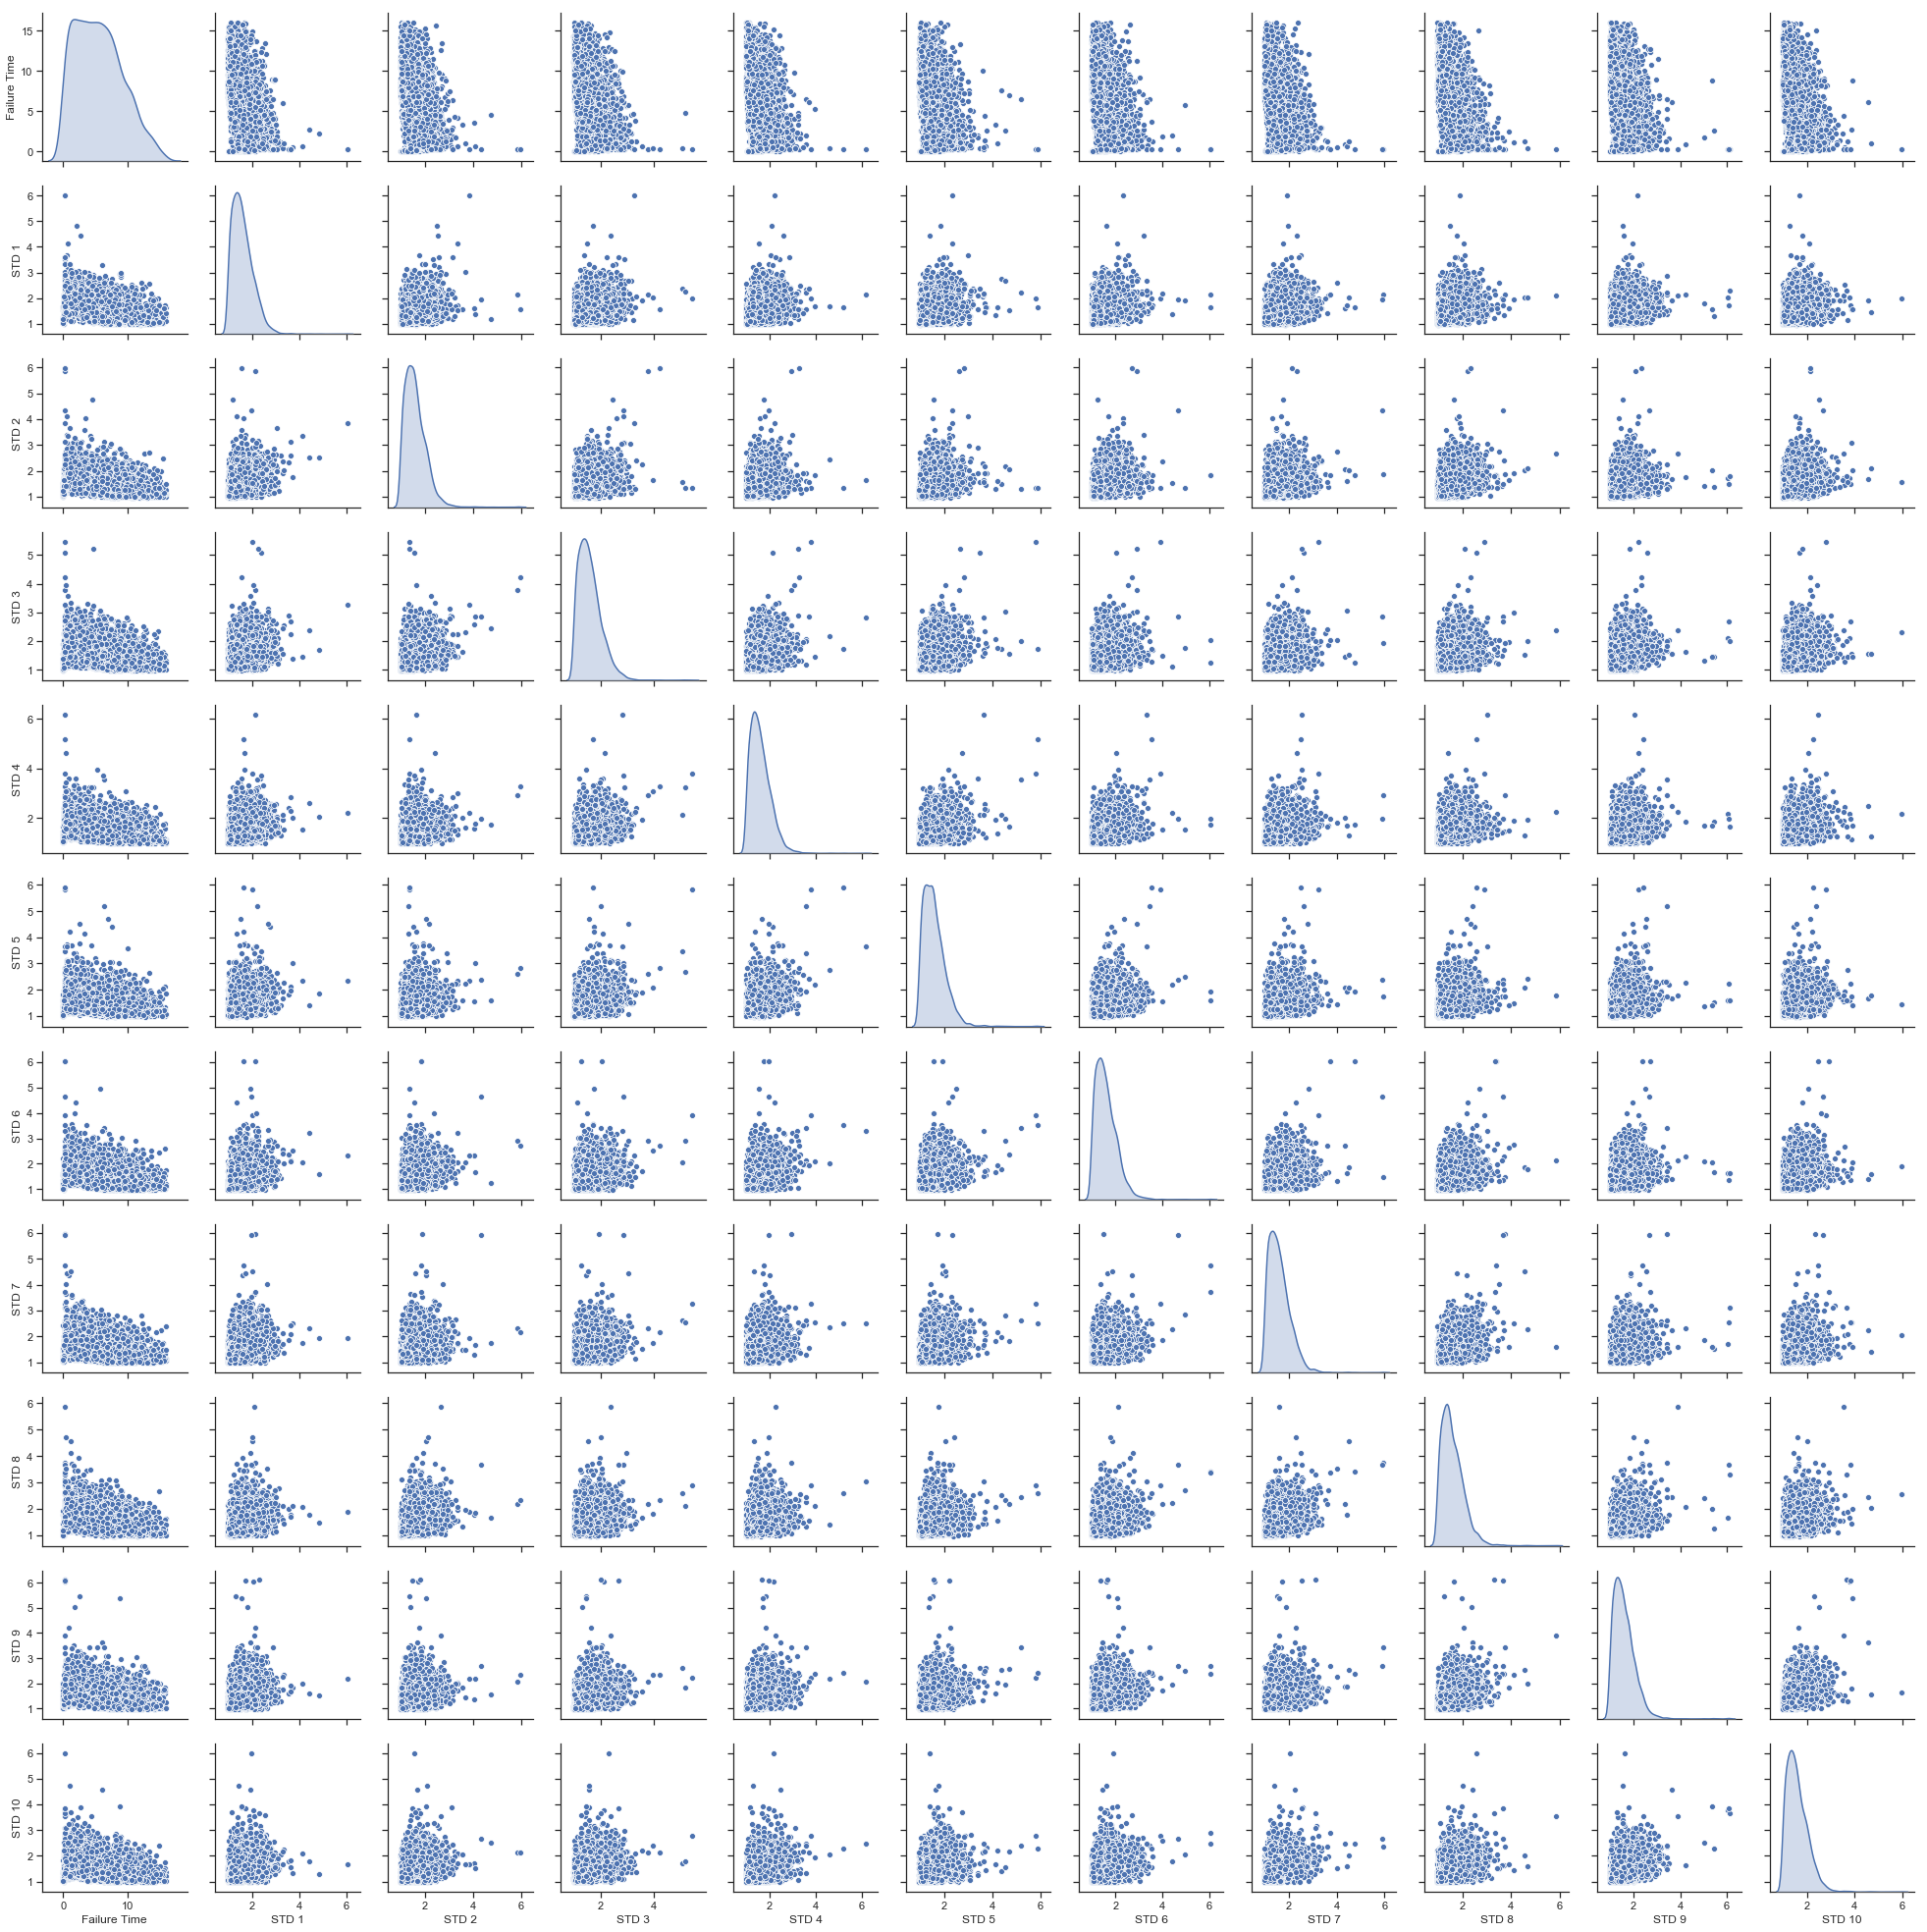

In [80]:
#return(np.hstack([STD,STD,STDx,stdd,kurt]))
d = {"Failure Time":time_to_event,\
     "STD 1":[feat_Vec[i][30] for i in range(len(feat_Vec))],\
     "STD 2":[feat_Vec[i][31] for i in range(len(feat_Vec))],\
     "STD 3":[feat_Vec[i][32] for i in range(len(feat_Vec))],\
     "STD 4":[feat_Vec[i][33] for i in range(len(feat_Vec))],\
     "STD 5":[feat_Vec[i][34] for i in range(len(feat_Vec))],\
     "STD 6":[feat_Vec[i][35] for i in range(len(feat_Vec))],\
     "STD 7":[feat_Vec[i][36] for i in range(len(feat_Vec))],\
     "STD 8":[feat_Vec[i][37] for i in range(len(feat_Vec))],\
     "STD 9":[feat_Vec[i][38] for i in range(len(feat_Vec))],\
     "STD 10":[feat_Vec[i][39] for i in range(len(feat_Vec))],}
df = pd.DataFrame(data=d)
g=sns.pairplot(df,diag_kind="kde")


C:\Users\Rees\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Rees\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\Rees\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


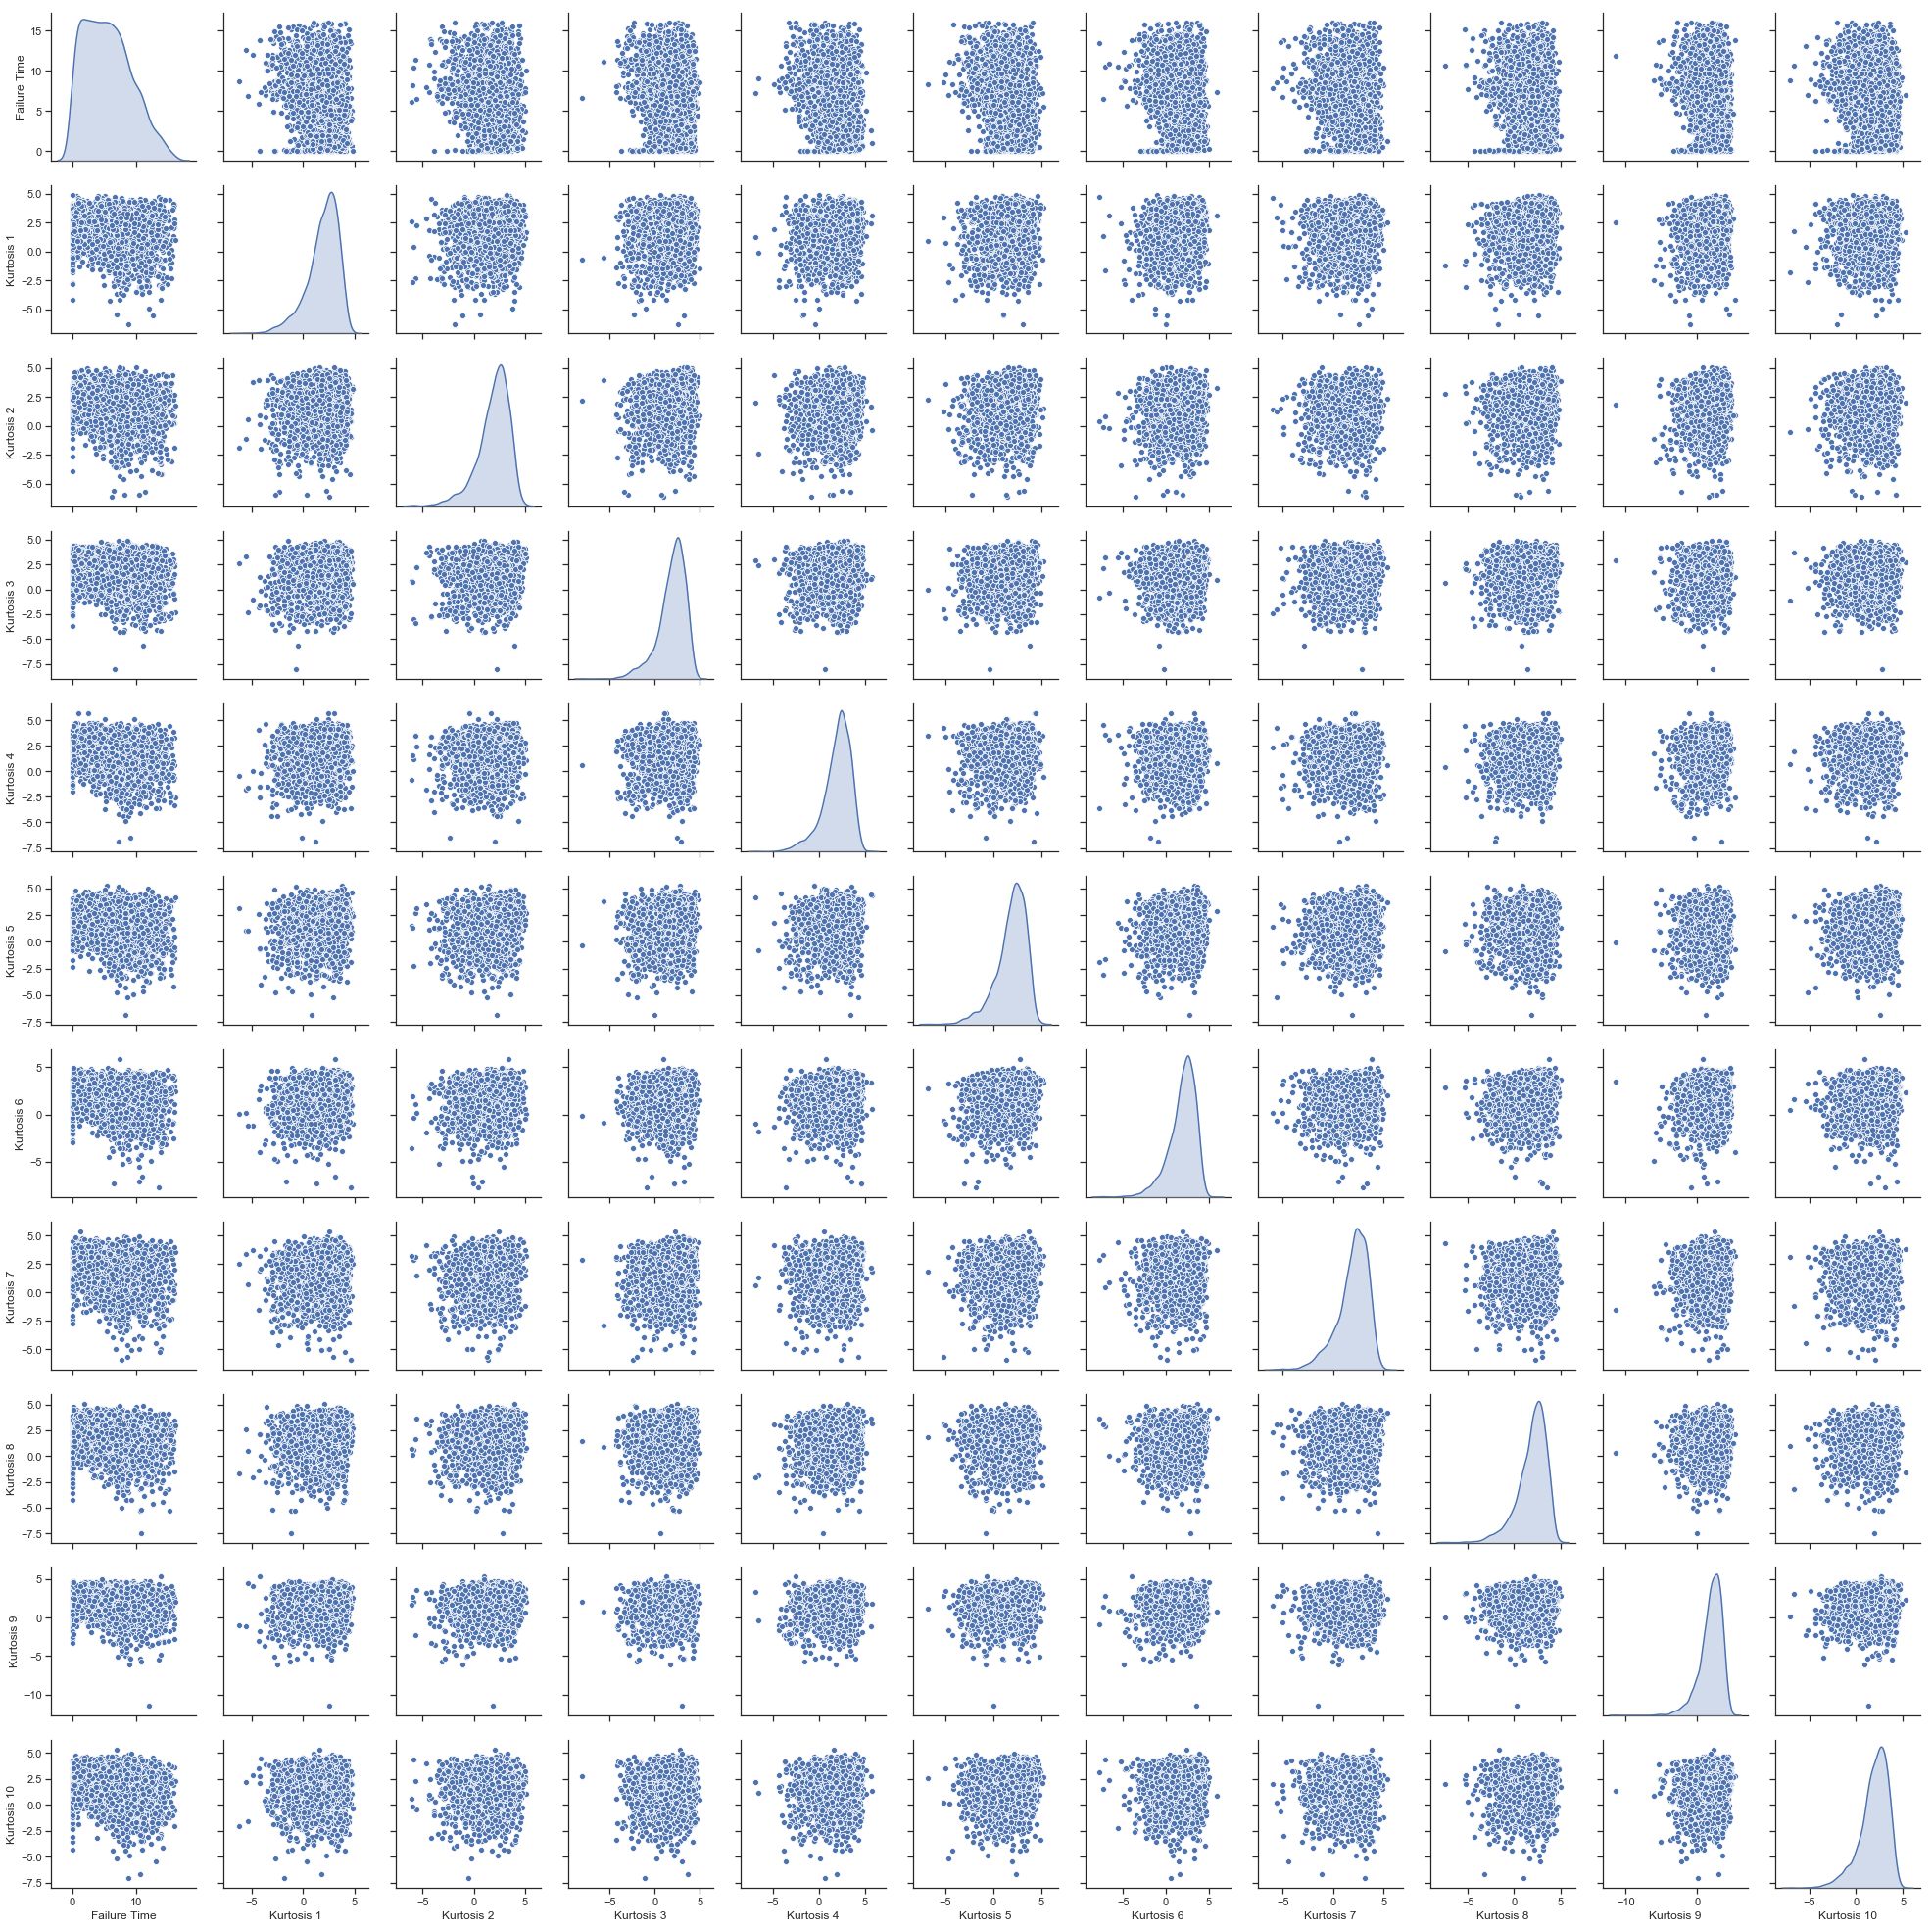

In [81]:
#return(np.hstack([Kurtosis,Kurtosis,Kurtosisx,Kurtosisd,kurt]))
d = {"Failure Time":time_to_event,\
     "Kurtosis 1":[feat_Vec[i][40] for i in range(len(feat_Vec))],\
     "Kurtosis 2":[feat_Vec[i][41] for i in range(len(feat_Vec))],\
     "Kurtosis 3":[feat_Vec[i][42] for i in range(len(feat_Vec))],\
     "Kurtosis 4":[feat_Vec[i][43] for i in range(len(feat_Vec))],\
     "Kurtosis 5":[feat_Vec[i][44] for i in range(len(feat_Vec))],\
     "Kurtosis 6":[feat_Vec[i][45] for i in range(len(feat_Vec))],\
     "Kurtosis 7":[feat_Vec[i][46] for i in range(len(feat_Vec))],\
     "Kurtosis 8":[feat_Vec[i][47] for i in range(len(feat_Vec))],\
     "Kurtosis 9":[feat_Vec[i][48] for i in range(len(feat_Vec))],\
     "Kurtosis 10":[feat_Vec[i][49] for i in range(len(feat_Vec))],}
df = pd.DataFrame(data=d)
g=sns.pairplot(df,diag_kind="kde")


In [111]:
#return(np.hstack([mean,skew,maxx,stdd,kurt]))
feat_Vec=[]
time_to_event=[]
chunker=5
cutter=int(150000/chunker)
for i in range(4000):
    sample1=x_train[i]
    time_to_event.append(y_train[i])
    holder=feature_extractor(sample1,cutter)
    indexes=[i for i in range(chunker-1)]
    means=holder[0:chunker-1]
    skews=holder[1*chunker:2*chunker-1]
    maxxes=holder[2*chunker:3*chunker-1]
    stddds=holder[3*chunker:4*chunker-1]
    kurtss=holder[4*chunker:5*chunker-1]
    feat_Vec.append(np.hstack([np.polyfit(indexes,stddds,2),np.polyfit(indexes,skews,2)]))


C:\Users\Rees\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in log
  


C:\Users\Rees\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


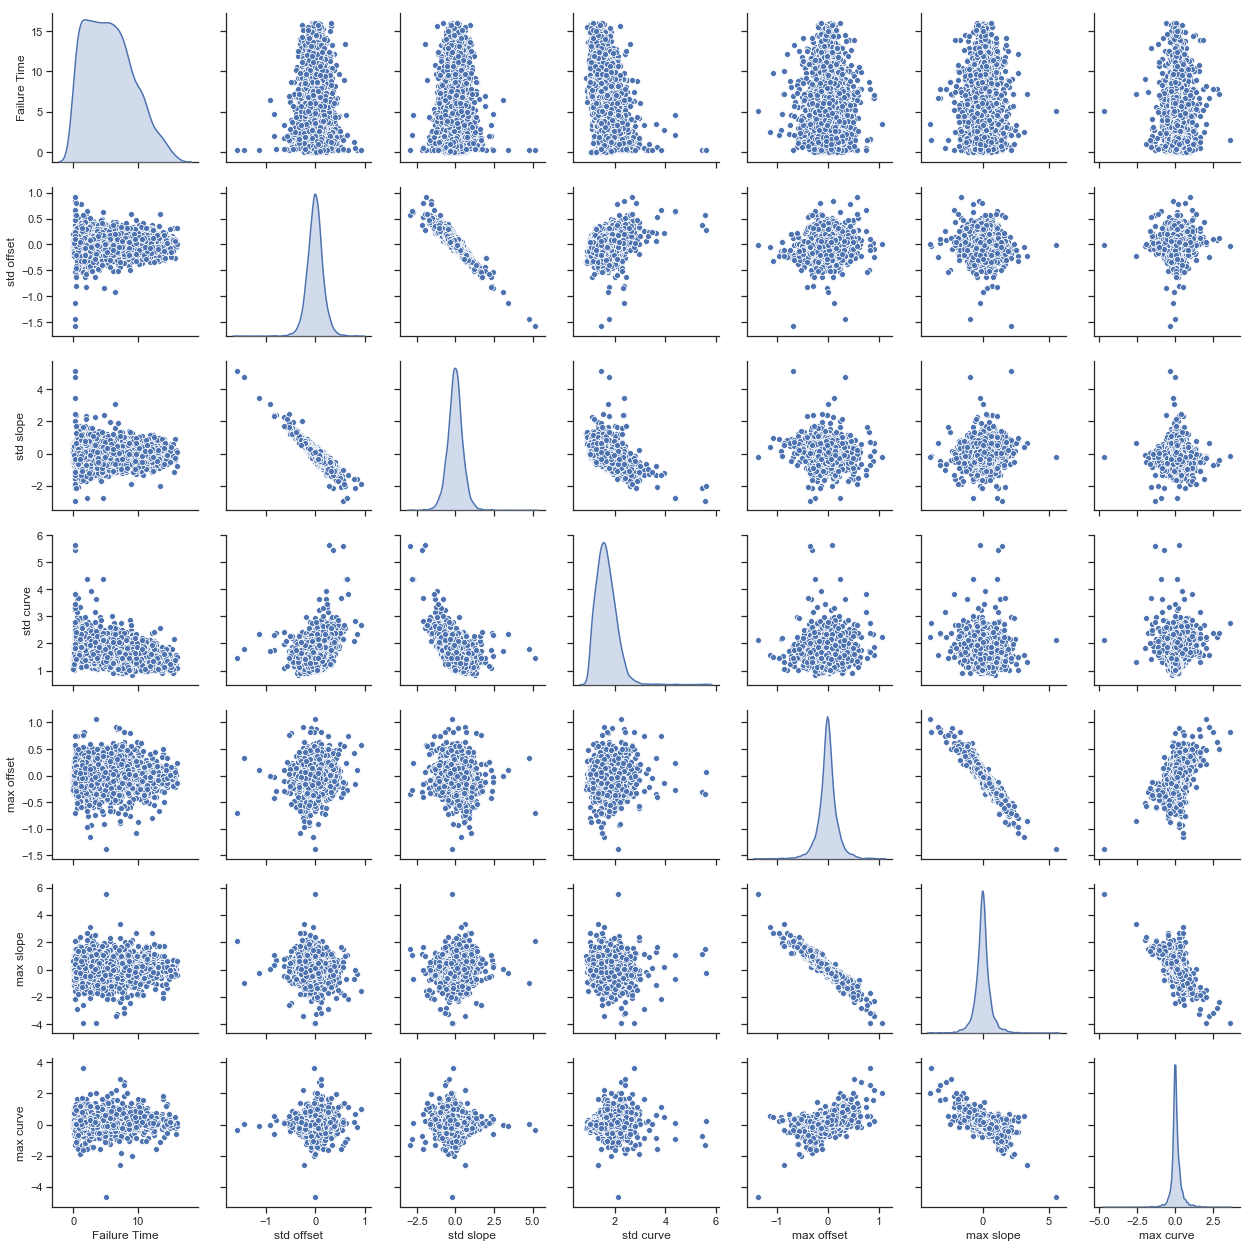

In [112]:
d = {"Failure Time":time_to_event,\
     "std offset":[feat_Vec[i][0] for i in range(len(feat_Vec))],\
     "std slope":[feat_Vec[i][1] for i in range(len(feat_Vec))],\
     "std curve":[feat_Vec[i][2] for i in range(len(feat_Vec))],\
     "max offset":[feat_Vec[i][3] for i in range(len(feat_Vec))],\
     "max slope":[feat_Vec[i][4] for i in range(len(feat_Vec))],\
     "max curve":[feat_Vec[i][5] for i in range(len(feat_Vec))],\
    }
df = pd.DataFrame(data=d)
g=sns.pairplot(df,diag_kind="kde")

C:\Users\Rees\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


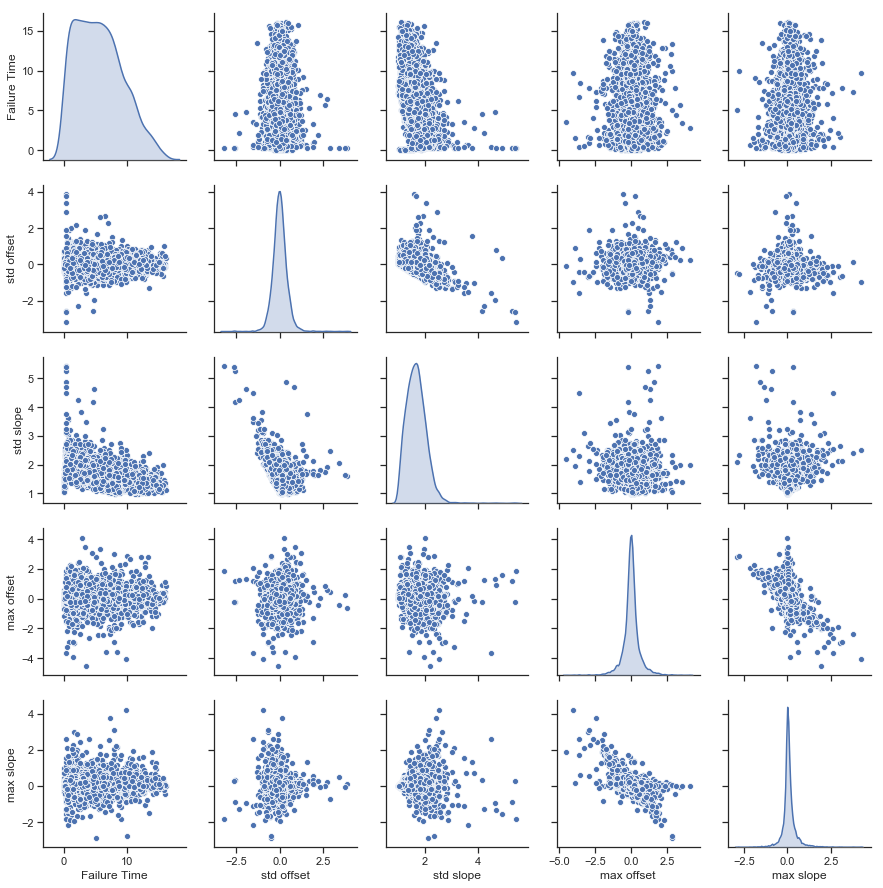

In [110]:
d = {"Failure Time":time_to_event,\
     "std offset":[feat_Vec[i][0] for i in range(len(feat_Vec))],\
     "std slope":[feat_Vec[i][1] for i in range(len(feat_Vec))],\
     "max offset":[feat_Vec[i][2] for i in range(len(feat_Vec))],\
     "max slope":[feat_Vec[i][3] for i in range(len(feat_Vec))],\
    }
df = pd.DataFrame(data=d)
g=sns.pairplot(df,diag_kind="kde")